In [55]:
from neural_features import ResNet50FeatureExtractor
import numpy as np
import pandas as pd
from torchvision.models import resnet50
from sklearn.neighbors import KNeighborsClassifier
import shutil
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



In [26]:
train_small_names = pd.read_csv('../dataset/train_small.csv', header=None)
train_unlabeled_names = pd.read_csv('../dataset/train_unlabeled.csv', header=None)

In [2]:

small_dataset = np.load('../dataset/features_cibo_avgpool_resnet50.npz', 'r')
X_strain = small_dataset['feat_tr']




In [7]:
features_extractor = ResNet50FeatureExtractor('../dataset/train_small.csv', '../dataset/small_dataset')
features_extractor.extract_features('./features.npz')

Elaborazione immagine 1/5020: train_059371.jpg
Elaborazione immagine 2/5020: train_059389.jpg
Elaborazione immagine 3/5020: train_059425.jpg
Elaborazione immagine 4/5020: train_059445.jpg
Elaborazione immagine 5/5020: train_059516.jpg
Elaborazione immagine 6/5020: train_059538.jpg
Elaborazione immagine 7/5020: train_059541.jpg
Elaborazione immagine 8/5020: train_059570.jpg
Elaborazione immagine 9/5020: train_059713.jpg
Elaborazione immagine 10/5020: train_059719.jpg
Elaborazione immagine 11/5020: train_059744.jpg
Elaborazione immagine 12/5020: train_059789.jpg
Elaborazione immagine 13/5020: train_059795.jpg
Elaborazione immagine 14/5020: train_059837.jpg
Elaborazione immagine 15/5020: train_059855.jpg
Elaborazione immagine 16/5020: train_059893.jpg
Elaborazione immagine 17/5020: train_059917.jpg
Elaborazione immagine 18/5020: train_059919.jpg
Elaborazione immagine 19/5020: train_059921.jpg
Elaborazione immagine 20/5020: train_059928.jpg
Elaborazione immagine 21/5020: train_089398.jpg
E

In [60]:
features_extractor = ResNet50FeatureExtractor('../dataset/train_unlabeled.csv', '../dataset/train_set')
features_extractor.extract_features('../dataset/train_unlabeled_features.npz', n = 633)

Elaborazione immagine 1/113455: train_059329.jpg
Elaborazione immagine 2/113455: train_059330.jpg
Elaborazione immagine 3/113455: train_059331.jpg
Elaborazione immagine 4/113455: train_059332.jpg
Elaborazione immagine 5/113455: train_059333.jpg
Elaborazione immagine 6/113455: train_059334.jpg
Elaborazione immagine 7/113455: train_059335.jpg
Elaborazione immagine 8/113455: train_059336.jpg
Elaborazione immagine 9/113455: train_059337.jpg
Elaborazione immagine 10/113455: train_059338.jpg
Elaborazione immagine 11/113455: train_059339.jpg
Elaborazione immagine 12/113455: train_059340.jpg
Elaborazione immagine 13/113455: train_059341.jpg
Elaborazione immagine 14/113455: train_059342.jpg
Elaborazione immagine 15/113455: train_059343.jpg
Elaborazione immagine 16/113455: train_059344.jpg
Elaborazione immagine 17/113455: train_059345.jpg
Elaborazione immagine 18/113455: train_059346.jpg
Elaborazione immagine 19/113455: train_059347.jpg
Elaborazione immagine 20/113455: train_059348.jpg
Elaborazi

In [61]:
small_dataset = np.load('../dataset/small_train_features.npz', 'r')
X = small_dataset['X']
X_label = small_dataset['y']

queryset = np.load('../dataset/train_unlabeled_features.npz', 'r')
Q = queryset['X']
Q_label = queryset['y']

# Image retrieval using KNN

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, X_label)

KNeighborsClassifier()

In [76]:
y_pred = knn.predict(Q)
y_pred

array([ 28,   0,  21,   0,   2,   0,  76,   0,  93,   0,   0,   0,  37,
         0,   0,   0,   0, 124,  29, 155,   0,   0,  46, 120,   0, 223,
        44,   3,   0,   0,   0, 164,  21,  22,   0,   0,   0,  45,   0,
         0,   0, 146,   0,   0,   0, 101,   0,   0,   0,   0,   0,  21,
         0, 188,  17,  21,   0,   0,   0,  21,   0,   0,   0,  62,   8,
        18,  11,   0,   0,   4, 120,   0,   0,   0,   0,   0,   0,  21,
         0,   9,   0,  52,  50,  57,  20,   0,   0,  21,  20,  59,   1,
         0,  53,   0,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  63,   0,   0,   0,   0,   0,  40,   0,  21,  20,   0,   0,
        35,  54,   0,   9,   0,  60,   0,   0,  11,  20,  68,   0,  21,
        20,  21,  20,   0,  20,  21,  11, 223,  49,   0,  11,  21,   0,
        20,   0, 172,  73, 109,   0,  44,   0, 188,   0,   0,   0,   0,
         0, 124,  20,   0,  62,   0,   0,   0, 223,  20, 193,   0,  39,
        21,  62,  60,   0,   0,   0,   0,   0,   0, 109,   0,  9

/tmp/ipykernel_28521/1672845634.py:5: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


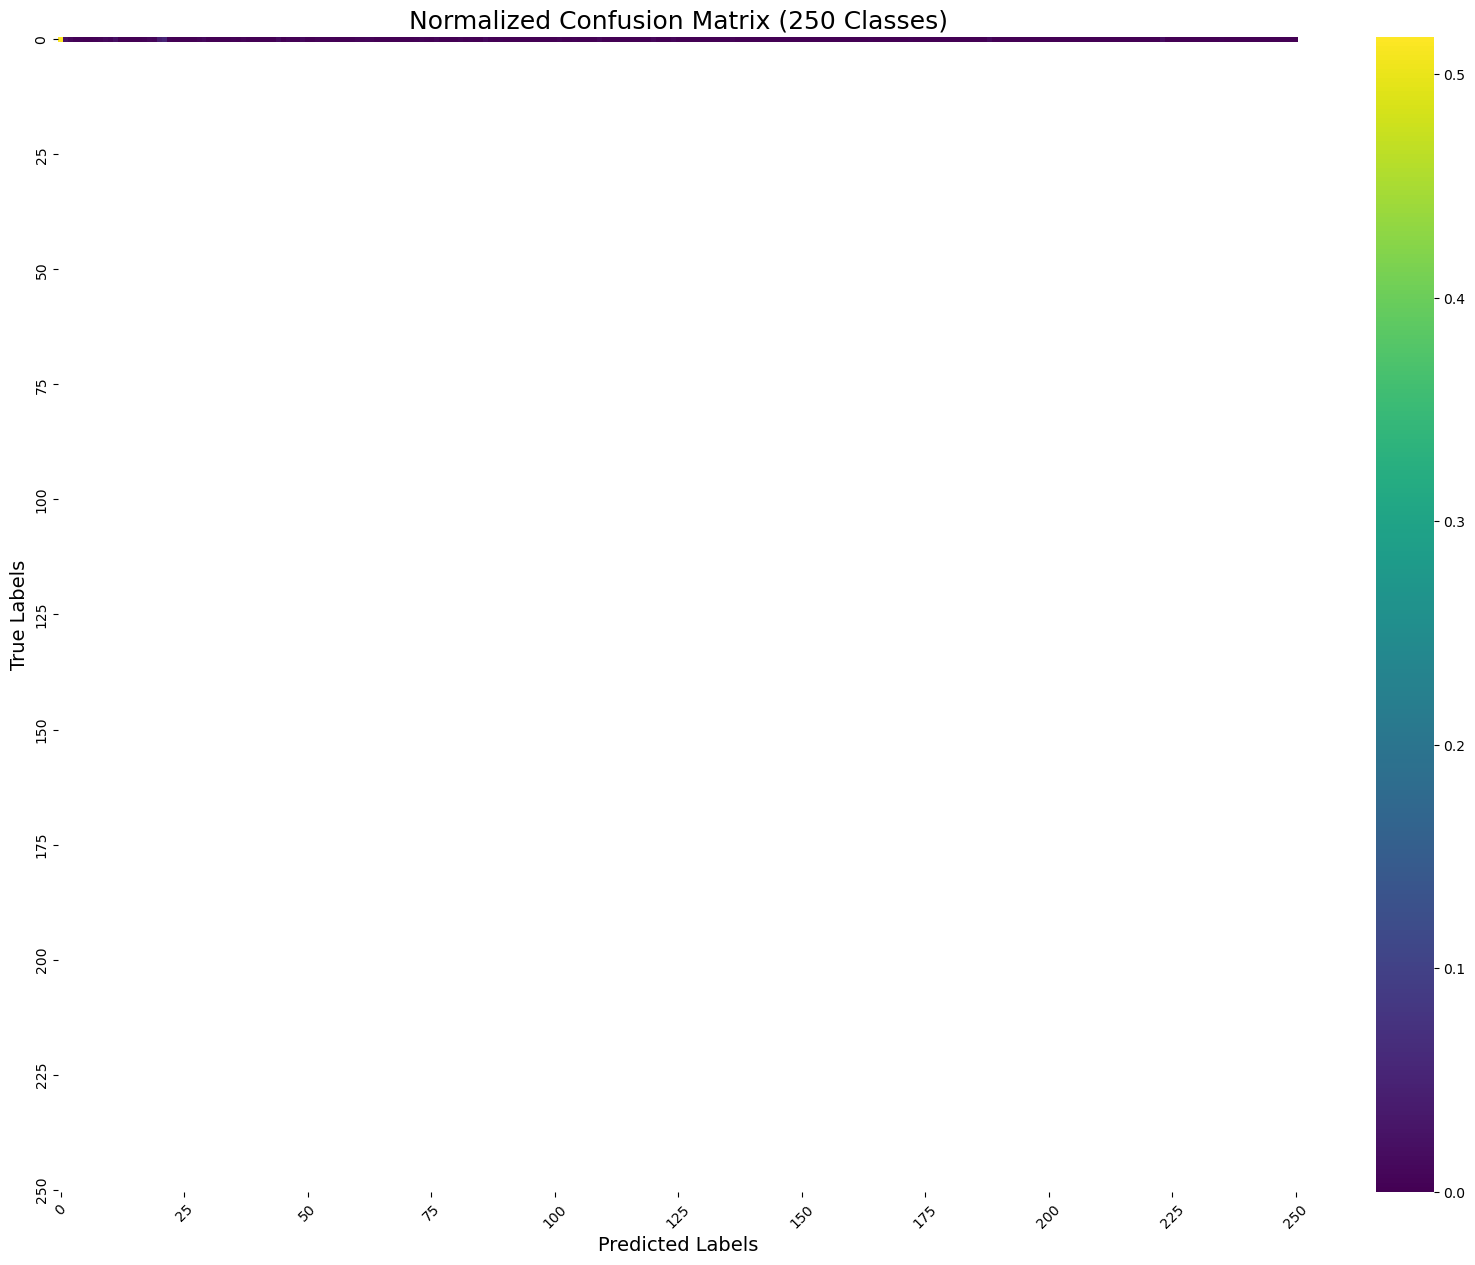

In [77]:
y_true = np.zeros((len(y_pred), ))

cm = confusion_matrix(y_true, y_pred, labels=range(251))

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Set the figure size
plt.figure(figsize=(20, 15))

# Plot using Seaborn's heatmap
sns.heatmap(
    cm_normalized,
    cmap='viridis',
    cbar=True,
    square=False,  # Use rectangular cells for better fit
    xticklabels=25,  # Show only 25 x-axis labels to avoid clutter
    yticklabels=25  # Show only 25 y-axis labels to avoid clutter
)

# Rotate and set axis labels
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Normalized Confusion Matrix (250 Classes)', fontsize=18)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()







In [79]:
print(f"Classi in cui almeno 5\% degli esempi della classe 0 vengono classificati")
for i, e in enumerate(cm_normalized[0]):
    if e >= 0.05
        print(f"{e} of {0}-class examples are classified as Class {i} ") 

array([0.51658768, 0.02369668, 0.00947867, 0.00315956, 0.00315956,
       0.00157978, 0.        , 0.00315956, 0.00473934, 0.01105845,
       0.00631912, 0.0221169 , 0.        , 0.00157978, 0.        ,
       0.00157978, 0.        , 0.00315956, 0.00947867, 0.00789889,
       0.04107425, 0.05371248, 0.00315956, 0.        , 0.00157978,
       0.        , 0.00157978, 0.00157978, 0.00473934, 0.01105845,
       0.        , 0.        , 0.        , 0.00157978, 0.        ,
       0.00315956, 0.        , 0.00473934, 0.        , 0.00157978,
       0.00157978, 0.        , 0.00157978, 0.00157978, 0.01421801,
       0.00157978, 0.00631912, 0.        , 0.        , 0.01105845,
       0.00315956, 0.00157978, 0.00473934, 0.00157978, 0.00157978,
       0.00315956, 0.        , 0.00157978, 0.00157978, 0.00315956,
       0.00631912, 0.00473934, 0.00789889, 0.00473934, 0.        ,
       0.        , 0.        , 0.00157978, 0.00157978, 0.        ,
       0.        , 0.        , 0.00315956, 0.00473934, 0.00315

In [78]:
# Compute classification report
cr = classification_report(y_true, y_pred, labels=range(251), zero_division=0)
print("\nClassification Report:")
print(cr)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.52      0.68       633
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
   

In [ ]:
for i, name in enumerate(train_small_names[0].to_list()):
    shutil.copyfile(f'../dataset/train_set/{name}', f'../dataset/check_discrimination/{y_pred[i-1]}/QUERY_{name}')
    print(f'Copy image {name} to {y_pred[i-1]} folder')

Copy image train_059371.jpg to 0 folder
Copy image train_059389.jpg to 136 folder
Copy image train_059425.jpg to 235 folder
Copy image train_059445.jpg to 21 folder
Copy image train_059516.jpg to 0 folder
Copy image train_059538.jpg to 116 folder
Copy image train_059541.jpg to 0 folder
Copy image train_059570.jpg to 162 folder
Copy image train_059713.jpg to 0 folder
Copy image train_059719.jpg to 174 folder


IndexError: index 10 is out of bounds for axis 0 with size 10